# Recommendation System

## Library Installation

In [1]:
# pip install wordcloud

In [69]:
# pip install surprise

In [71]:
# pip install svglib

In [74]:
# pip install pydot

In [78]:
# pip install graphviz

In [111]:
# pip install tree

## Libraries

In [3]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools
import random


In [4]:
# Modelling Helpers :
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

In [5]:
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

## Datasets

In [8]:
movie_rating = pd.read_csv('movielens/rating.csv')
movie_rating.drop(['timestamp'], axis = 1, inplace = True)
movie_rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [9]:
movie_rating.shape

(20000263, 3)

In [10]:
movie_rating['userId'].nunique()

138493

In [11]:
random.seed(0)
sample_users = random.sample(list(movie_rating["userId"]), 800)
print(len(sample_users))
# print(sample_users.head(10))

800


In [12]:
sample_rating_data = movie_rating[movie_rating["userId"].isin(sample_users)]
print(sample_rating_data.shape)
sample_rating_data.head()

(398976, 3)


,userId,movieId,rating
2302,22,1,3.0
2303,22,6,5.0
2304,22,16,5.0
2305,22,47,4.0
2306,22,50,4.0


In [13]:
movie_name = pd.read_csv('movielens/movie.csv')
movie_name.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
movie_name.shape

(27278, 3)

In [15]:
# movie_link = pd.read_csv('movielens/link.csv')
# movie_link.head()

In [16]:
# movie_link.shape

In [17]:
# movie_genome_tag = pd.read_csv('movielens/genome_tags.csv')
# movie_genome_tag.head()

In [18]:
# movie_genome_tag.shape

In [19]:
# movie_genome_score = pd.read_csv('movielens/genome_scores.csv')
# movie_genome_score.head()

In [20]:
# movie_genome_score.shape

In [21]:
rating_name = pd.merge(sample_rating_data, movie_name, on = 'movieId')
rating_name.head()

,userId,movieId,rating,title,genres
0,22,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,295,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,377,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,572,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,741,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [22]:
rating_name.shape
# max(rating_name['rating'])

(398976, 5)

## Defining Genres

In [23]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in rating_name['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [24]:
genres

{'Adventure': 74511,
 'Animation': 19397,
 'Children': 29192,
 'Comedy': 149606,
 'Fantasy': 38150,
 'Action': 99046,
 'Crime': 62518,
 'Thriller': 100850,
 'Drama': 184864,
 'Mystery': 30478,
 'War': 19964,
 'Sci-Fi': 54717,
 'Western': 8849,
 'Romance': 74888,
 'Horror': 31731,
 'IMAX': 8327,
 'Musical': 16839,
 'Documentary': 7399,
 'Film-Noir': 4708,
 '(no genres listed)': 24}

In [25]:
genres['None'] = genres.pop('(no genres listed)')

### WordCloud based on the value counts of Genres

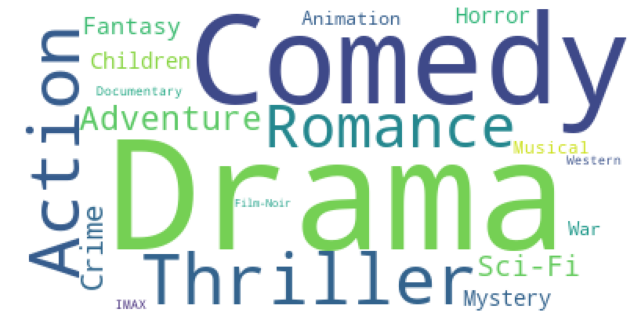

In [26]:
from wordcloud import WordCloud
plt.figure(figsize = (10, 7))
wordcloud = WordCloud(width=400, height=200, 
                      background_color = 'white', min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Movies with maximum Ratings

In [27]:
top_n_ratings = pd.DataFrame(rating_name.groupby('title')['rating'].mean())
top_n_ratings['total ratings'] = pd.DataFrame(rating_name.groupby('title')['rating'].count())
top_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

top_n_ratings.sort_values('total ratings', ascending=False).head(20)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.047332,581
Pulp Fiction (1994),4.260417,576
"Shawshank Redemption, The (1994)",4.394404,554
"Silence of the Lambs, The (1991)",4.144283,551
Jurassic Park (1993),3.647005,551
"Matrix, The (1999)",4.204415,521
Braveheart (1995),3.952055,511
Star Wars: Episode IV - A New Hope (1977),4.162745,510
Terminator 2: Judgment Day (1991),3.957594,507


### Movies with individual Ratings

In [28]:
top_n_ratings.sort_values('mean ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Dying of Laughter (Muertos de Risa) (1999),5.0,1
24 City (Er shi si cheng ji) (2008),5.0,1
"Great Happiness Space, The: Tale of an Osaka Love Thief (2006)",5.0,1
Ween Live in Chicago (2004),5.0,1
Forever (2006),5.0,1
Play Girl (1941),5.0,1
Perifery (Härmä) (2012),5.0,1
Sergeant Körmy and the South Pacific (Vääpeli Körmy ja etelän hetelmät) (1992),5.0,1
Mood Indigo (L'écume des jours) (2013),5.0,1


In [29]:
# Checking the movies with individual rating 

print('Total no of users that gave rating of 5.0 : ', len(top_n_ratings.loc[top_n_ratings['mean ratings'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(top_n_ratings.loc[(top_n_ratings['mean ratings'] == 5) 
                                                                           & (top_n_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  145 

Total no of Individual users that gave rating of 5.0 :  142


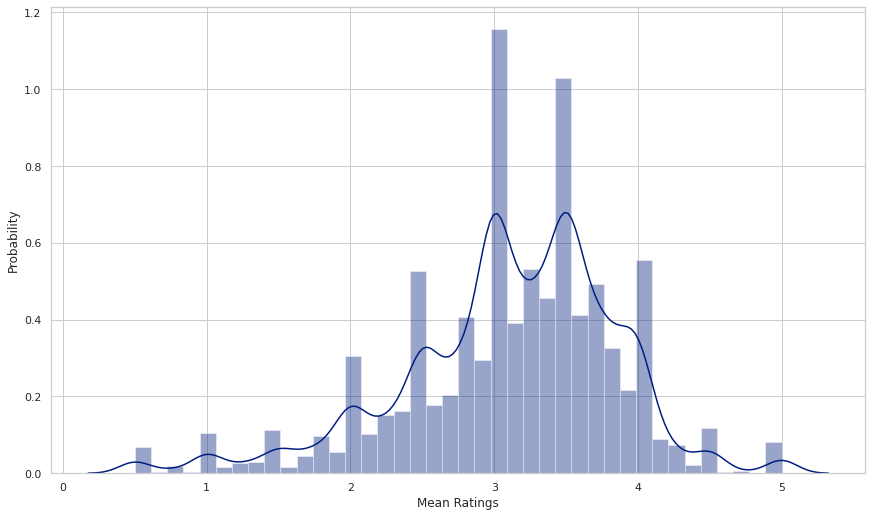

In [30]:
plt.figure(figsize=(13,8))
sns.distplot(top_n_ratings['mean ratings'], bins=40)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

## Model Based Collaborative Filtering

Pivot Table to understand User, Item and Ratings relation 

In [33]:
pd.pivot_table(rating_name, values='rating', index='userId', columns='title')

title,$9.99 (2008),'71 (2014),"'Human' Factor, The (Human Factor, The) (1975)",'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),"¡Alambrista! (Illegal, The) (1977)",¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Árido Movie (2005)
userId,,,,,,,,,,,,,,,,,,,,,
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Libraries for Model

In [39]:
from keras.layers import Embedding, Input, dot, concatenate
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

### Spliting Data

In [40]:
X = movie_rating.iloc[:,:2]
Y = movie_rating.iloc[:,2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

In [41]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and movies
n_users, n_movies = len(movie_rating['userId'].unique()), len(movie_rating['movieId'].unique()) 

### Model Architecture

In [42]:
# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)


# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)


# Dot Product
merged_vectors = dot([user_vector, movie_vector], name='Dot_Product', axes=1)
model = Model([user_input, movie_input], merged_vectors)

2022-07-14 18:37:42.573212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 18:37:42.573486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 18:37:42.610446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 18:37:42.610720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 18:37:42.610934: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [90]:
# SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [80]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User_Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Movie_Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User_Embedding (Embedding)     (None, 1, 50)        6924650     ['User_Input[0][0]']             
                                                                                                  
 Movie_Embedding (Embedding)    (None, 1, 50)        1337200     ['Movie_Input[0][0]']            
                                                                                            

### Model Compilation

In [45]:
optimizer = Adam(lr = 0.0005)

model.compile(loss='mean_squared_error', optimizer = optimizer)

In [46]:
batch_size = 128
epochs = 20

### Training Model Architechture 1

In [47]:
history = model.fit(x=[x_train['userId'], x_train['movieId']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['userId'], x_test['movieId']], y_test))

Epoch 1/20
125002/125002 - 508s - loss: 3.2677 - val_loss: 2.2628 - 508s/epoch - 4ms/step
Epoch 2/20
125002/125002 - 517s - loss: 2.2162 - val_loss: 2.1878 - 517s/epoch - 4ms/step
Epoch 3/20
125002/125002 - 562s - loss: 2.1404 - val_loss: 2.1520 - 562s/epoch - 4ms/step
Epoch 4/20
125002/125002 - 526s - loss: 2.0830 - val_loss: 2.1402 - 526s/epoch - 4ms/step
Epoch 5/20
125002/125002 - 615s - loss: 2.0380 - val_loss: 2.1413 - 615s/epoch - 5ms/step
Epoch 6/20
125002/125002 - 565s - loss: 2.0058 - val_loss: 2.1487 - 565s/epoch - 5ms/step
Epoch 7/20
125002/125002 - 528s - loss: 1.9835 - val_loss: 2.1572 - 528s/epoch - 4ms/step
Epoch 8/20
125002/125002 - 572s - loss: 1.9674 - val_loss: 2.1655 - 572s/epoch - 5ms/step
Epoch 9/20
125002/125002 - 543s - loss: 1.9555 - val_loss: 2.1731 - 543s/epoch - 4ms/step
Epoch 10/20
125002/125002 - 510s - loss: 1.9462 - val_loss: 2.1803 - 510s/epoch - 4ms/step
Epoch 11/20
125002/125002 - 508s - loss: 1.9390 - val_loss: 2.1866 - 508s/epoch - 4ms/step
Epoch 12

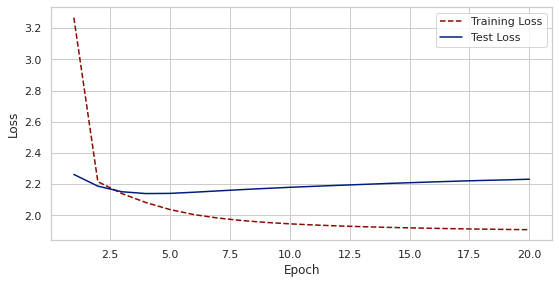

In [48]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Saving Model Architechture 1

In [58]:
model.save("history.h5")

### Evaluating Model

In [49]:
score = model.evaluate([x_test['userId'], x_test['movieId']], y_test)
print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

125002/125002 [==============================] - 225s 2ms/step - loss: 2.2322

RMSE: 1.4941


## Model 2

### Model Architecture 2

In [59]:
# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)



# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)




# Concatenate Product
merged_vectors = concatenate([user_vector, movie_vector], name='Concantenate')
dense_layer_1 = Dense(100, activation='relu')(merged_vectors) 
# dense_layer_1 = Dropout(0.25) (dense_layer_1)
# batchnorm_layer_1 = BatchNormalization()(dense_layer_1)
# dense_layer_2 = Dense(64, activation='relu')(merged_vectors)


result = Dense(1)(dense_layer_1)
model = Model([user_input, movie_input], result)

In [60]:
# SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [61]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User_Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Movie_Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User_Embedding (Embedding)     (None, 1, 50)        6924650     ['User_Input[0][0]']             
                                                                                                  
 Movie_Embedding (Embedding)    (None, 1, 50)        1337200     ['Movie_Input[0][0]']            
                                                                                            

### Compiling Model

In [110]:
optimizer = Adam(lr=0.0002)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [64]:
batch_size = 128
epochs = 20

### Training Model Architecture 2

In [65]:
history_architech2 = model.fit(x=[x_train['userId'], x_train['movieId']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['userId'], x_test['movieId']], y_test))

Epoch 1/20
125002/125002 - 513s - loss: 0.7945 - val_loss: 0.7214 - 513s/epoch - 4ms/step
Epoch 2/20
125002/125002 - 552s - loss: 0.6960 - val_loss: 0.6888 - 552s/epoch - 4ms/step
Epoch 3/20
125002/125002 - 535s - loss: 0.6589 - val_loss: 0.6731 - 535s/epoch - 4ms/step
Epoch 4/20
125002/125002 - 538s - loss: 0.6337 - val_loss: 0.6639 - 538s/epoch - 4ms/step
Epoch 5/20
125002/125002 - 535s - loss: 0.6102 - val_loss: 0.6581 - 535s/epoch - 4ms/step
Epoch 6/20
125002/125002 - 592s - loss: 0.5893 - val_loss: 0.6566 - 592s/epoch - 5ms/step
Epoch 7/20
125002/125002 - 570s - loss: 0.5715 - val_loss: 0.6566 - 570s/epoch - 5ms/step
Epoch 8/20
125002/125002 - 661s - loss: 0.5563 - val_loss: 0.6583 - 661s/epoch - 5ms/step
Epoch 9/20
125002/125002 - 576s - loss: 0.5431 - val_loss: 0.6605 - 576s/epoch - 5ms/step
Epoch 10/20
125002/125002 - 594s - loss: 0.5318 - val_loss: 0.6634 - 594s/epoch - 5ms/step
Epoch 11/20
125002/125002 - 556s - loss: 0.5220 - val_loss: 0.6666 - 556s/epoch - 4ms/step
Epoch 12

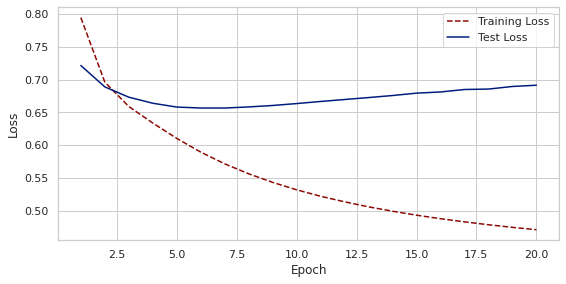

In [66]:
# Get training and test loss histories
training_loss = history_architech2.history['loss']
test_loss = history_architech2.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Saving Model

In [67]:
model.save("history_architech2.h5")

### Evaluating Model

In [68]:
score = model.evaluate([x_test['userId'], x_test['movieId']], y_test)

print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

125002/125002 [==============================] - 338s 3ms/step - loss: 0.6914

RMSE: 0.8315
